<a href="https://colab.research.google.com/github/biku1998/Applied_Stats/blob/master/Applied_Stats_03_Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sampling Distribution : 
Let's say we have a distribution (population distribution) of  random variable X (not necessarily gaussian)

Suppose we pick a random sample (a subset of population) of size n -> S1

we again pick a random sampl of size n -> S2

we keep doing the above step  and we have Sm (m samples)

Now let's compute the mean of all the samples we have 

S1 mean = x̄1, 
S2 mean = x̄2,
S3 mean = x̄3 ....... x̄m(this is sample mean, not population mean)

Now we have x̄1,x̄3,x̄3....x̄m ~ m sample means

**All these means also have a distribution i.e pdf, This distribution of sample means is called Sampling distribution of sample means**




## Central Limit theoram

    Suppose we have a large dataset with a finite mean and variance,
    the CTL says the sampling distribution of sample means is
    distributed Normally with mean ~ population mean and 
    variance ~ (population variance) / sample size

More mathematically 

$$ Xi \approx N(\mu,\frac{\sigma^2}{n}) as~n\rightarrow\infty ~~~ Where~~~ \mu=Population~~ mean,\sigma^2 = Population~~~variance,Xi=means~~of~~samples $$

Some Important pointers
* The original data can be any distribution say discrete, continuous, binomial etc
* The central limit theoram will start working really good when sample size >= 30

But why is this important ?

In many real applications, a certain random variable of interest       is a sum of a large number of independent random variables. In         these situations, we are often able to use the CLT to justify          using the normal distribution.

Another thing is when our population say a mllion and we want to understand our population, we can take 1000 samples each of size 30, compute thier mean , and i know by CLT i will get a Normal distribution whose mean is equal to population and variance is variance of population by sample size. So by looking at only 30k points i can understand my whole population 



In [0]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

population mean :  59899.194025
population variance :  1204010667.212746


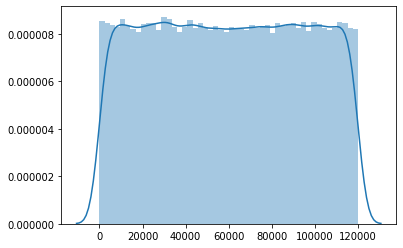

In [12]:
population = np.random.randint(1,120000,120000)
print('population mean : ',np.mean(population))
print('population variance : ',np.var(population))
plt.show()

sns.distplot(population)
plt.show()

In [0]:
def demo_central_limit_theoram(population,sample_size=30,no_of_sample = 1000):
    """
    With the help of this function we will try to see how central limit theoram works
    """
    sample_means = []
    for s in range(no_of_sample):
        random_sample = np.random.choice(population,sample_size)
        sample_means.append(np.mean(random_sample))
    
    print('mean of sample means',np.mean(sample_means))
    print('mean of original population',np.mean(population))
    print('variance of sample means',np.var(sample_means))
    print('variance of population ',np.var(population))
    print('variance of sample means * sample_size = ',np.var(sample_means)*sample_size,' ~ original population variance')

    sns.distplot(sample_means)
    plt.show()

        

**The above function will show us how central limit theoram works, we will change sample_size and no_of_samples and will notice how the distributon is changing to Normal distribution**

mean of sample means 59888.24423333333
mean of original population 59899.194025
variance of sample means 41598651.983733416
variance of population  1204010667.212746
variance of sample means * sample_size =  1247959559.5120025  ~ original population variance


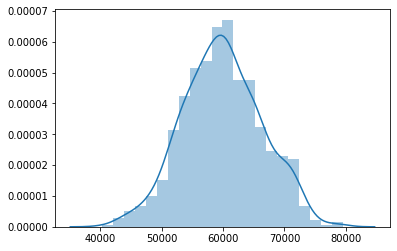

In [28]:
demo_central_limit_theoram(population)

mean of sample means 59888.89886
mean of original population 59899.194025
variance of sample means 11589401.647769101
variance of population  1204010667.212746
variance of sample means * sample_size =  1158940164.77691  ~ original population variance


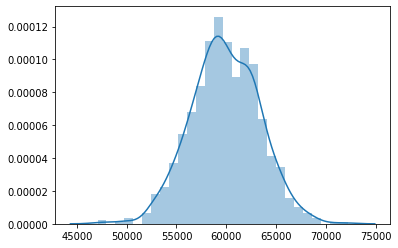

In [29]:
demo_central_limit_theoram(population,sample_size=100)

mean of sample means 59863.39499666667
mean of original population 59899.194025
variance of sample means 5966548.607629901
variance of population  1204010667.212746
variance of sample means * sample_size =  1193309721.5259802  ~ original population variance


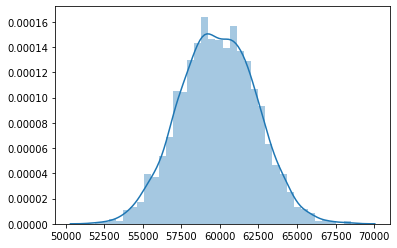

In [31]:
demo_central_limit_theoram(population,sample_size=200,no_of_sample=3000)

Observation : As we can see as we are inceresing our sample size, our Sampling distribution of sample mean is behaving more and more like Normal distribution

## How to know if a variable is Normally distributed ?

    There are many techniques to check if a variable is normally distributed or not.One of the graphical techniques is 
    QQplot(Quantile Quantile plot).

Let's say we have a random variable X and we have 500 observation from this random variable say x1,x2,x3.....x500


How to plot QQ plot ?
* Sort the values i.e. Xi's here and compute the percentiles upto 100.
* We will take a random variable Y which is N(0,1) i.e. Standard Normal Variate, take 500 observations from Y , Sort them and compute percentiles upto 100 percentiles i.e Y[5] will be 1st perecentile,Y[10] will be 2nd percentile and so on.
* Plot QQ plot where x axis  = percentiles from Y Standard Normal variate(also called theoritical quantiles) and y axis = percentiles from Y random variable
* if all the points on the plot lie on a straight line then our random variable X and random variable Y have similar distribution. That means X also has gaussian distribution




Let's plot QQ plot

In [0]:
import scipy.stats as stats
import pylab

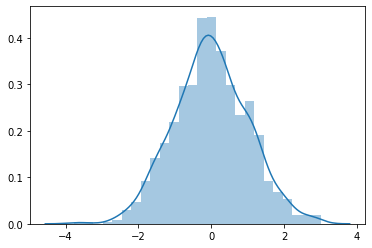

In [34]:
# genrate sample from random distribution
std_normal = np.random.normal(loc = 0,scale = 1,size = 1000)# loc = mean,scale = std here
sns.distplot(std_normal)

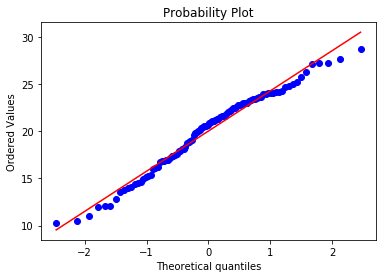

In [36]:
# generate samples to test
x = np.random.normal(loc = 20,scale=5,size = 100)

# plotting QQ plot
stats.probplot(x,dist='norm',plot = pylab) # dist = 'norm' will make sure it will compare our variable x with gaussuan distribution
pylab.show()

Since x was from gaussian family, all the points in the QQ plot is on a straight line

Let's see some variables in our heart dataset who are from gaussian family

In [0]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv')

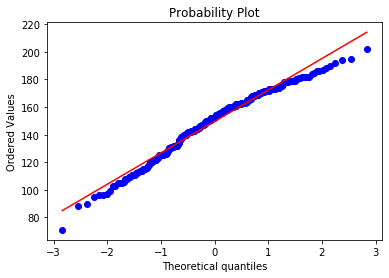

In [46]:
feature = 'thalach'
stats.probplot(df_heart[feature],dist='norm',plot = pylab)
pylab.show()

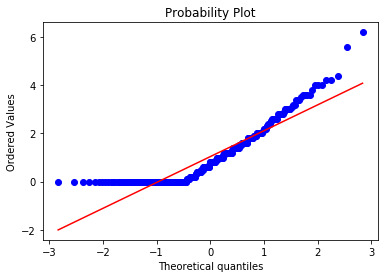

In [42]:
feature = 'oldpeak'
stats.probplot(df_heart[feature],dist='norm',plot = pylab)
pylab.show()

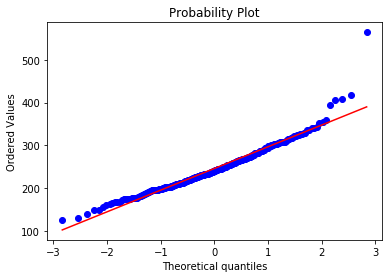

In [44]:
feature = 'chol'
stats.probplot(df_heart[feature],dist='norm',plot = pylab)
pylab.show()

**Diadvantage of QQ plot: When sample size is very small , QQ plot tends to fail**

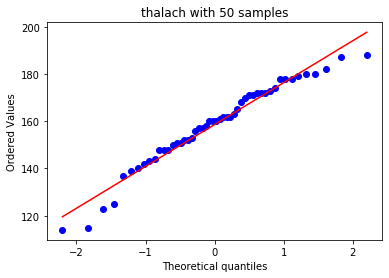

In [48]:
feature = 'thalach'
stats.probplot(df_heart[feature].tolist()[:50],dist='norm',plot = pylab)
pylab.title('thalach with 50 samples')
pylab.show()

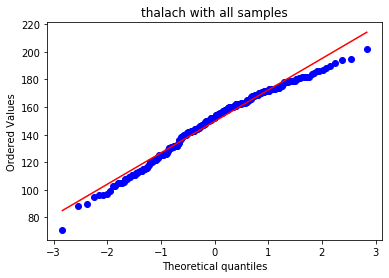

In [49]:
feature = 'thalach'
stats.probplot(df_heart[feature],dist='norm',plot = pylab)
pylab.title('thalach with all samples')
pylab.show()

The other question that QQ plot can answer is does X and Y have same distribution ?